In [1]:
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import analysis as an

In [4]:
import visualisation as vis

In [5]:
import network as nt

In [6]:
df=pd.read_csv("../data/CometLanding_ref.csv")

In [7]:
#times = an.getTweetsPerDay(df)

In [8]:
#vis.plotTweetsPerDay(times)

In [9]:
 print("Number of unique users:", an.getNumberOfUniqueUsers(df))

Number of unique users: 50157


In [10]:
# an.printAnalysis(df)

In [11]:
# an.printAverages(df)

In [12]:
#vis.plotStructure(df)

In [13]:
#dict = an.getAppsUsed(df)

In [14]:
#an.getPopularApps(5, dict)

In [15]:
#vis.plotStructure(df)

In [16]:
#vis.plotApps(df)

In [17]:
#hoursOfTweets = an.getTweetsAtTimeOfDayGlobal(df)

In [18]:
#vis.plotTweetsPerHour(hoursOfTweets)

In [19]:
# hoursOfTweetsLocal = an.getTweetsAtTimeOfDayLocal(df)

In [20]:
#vis.plotTweetsPerHour(hoursOfTweetsLocal)

In [21]:
#nt.getNodesOfUsers(df)

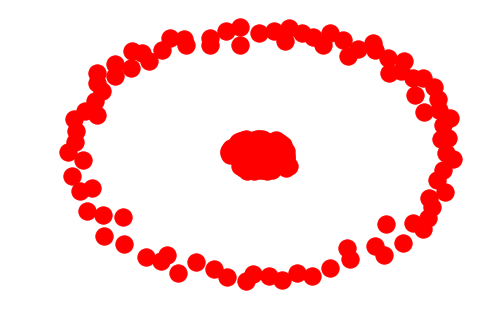

In [22]:
nt.drawNetwork(df)